## Download and prepare the dataset

In [30]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow import random
import tensorflow.python.keras as k

random.set_seed(512)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Download and prepare the dataset

In [31]:

from tensorflow.python.keras import layers
from tensorflow.python.keras import models

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

Let's display the architecture of our convnet so far:

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [33]:
earlystop_callback = k.callbacks.EarlyStopping(monitor='val_accuracy',patience=6)

model.compile(optimizer='adam',
              loss=k.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [34]:
history = model.fit(train_images,
                    train_labels,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[earlystop_callback])

Epoch 1/5


2023-06-21 12:45:46.485985: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 169344000 exceeds 10% of free system memory.


422/422 [==============================] - 6s 13ms/step - loss: 0.2985 - accuracy: 0.9200 - val_loss: 0.0767 - val_accuracy: 0.9793
Epoch 2/5
422/422 [==============================] - 6s 13ms/step - loss: 0.0720 - accuracy: 0.9791 - val_loss: 0.0535 - val_accuracy: 0.9852
Epoch 3/5
422/422 [==============================] - 8s 18ms/step - loss: 0.0482 - accuracy: 0.9861 - val_loss: 0.0524 - val_accuracy: 0.9860
Epoch 4/5
422/422 [==============================] - 7s 17ms/step - loss: 0.0371 - accuracy: 0.9891 - val_loss: 0.0426 - val_accuracy: 0.9868
Epoch 5/5
422/422 [==============================] - 7s 17ms/step - loss: 0.0303 - accuracy: 0.9910 - val_loss: 0.0415 - val_accuracy: 0.9885


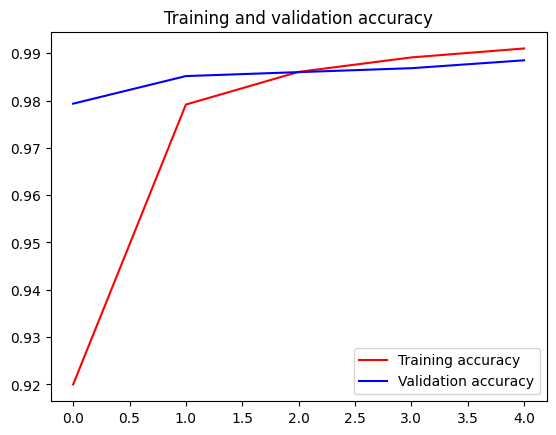

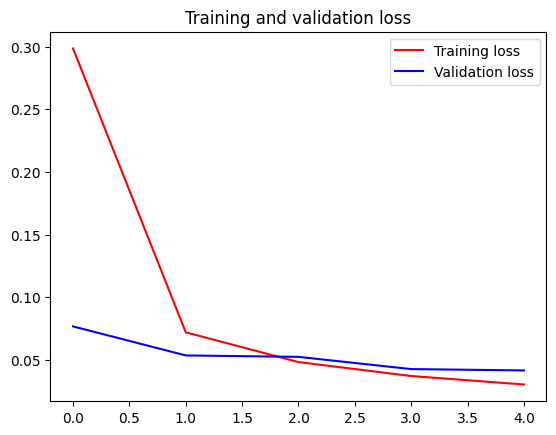

In [35]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  Evaluating the model on the test set

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

  1/313 [..............................] - ETA: 4s - loss: 0.0321 - accuracy: 0.9688

313/313 [==============================] - 1s 4ms/step - loss: 0.0377 - accuracy: 0.9875


In [37]:
test_acc

0.987500011920929

In [38]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
first_layer_weights

array([[[[-0.20570648,  0.02404022, -0.23603892, -0.0211116 ,
           0.26440945, -0.06525745, -0.22527024, -0.30123875,
           0.16485265, -0.18423769, -0.15216549,  0.02557294,
          -0.04286834, -0.32854468, -0.21634291, -0.00481793]],

        [[ 0.08939409, -0.00377623, -0.3469885 ,  0.11185619,
           0.06605202,  0.27058586, -0.01091256, -0.28735867,
          -0.08133066, -0.2887855 , -0.10320257, -0.23343566,
           0.10125107, -0.13675271,  0.13744955, -0.26878685]],

        [[ 0.14017783, -0.01443616, -0.25360712,  0.25005245,
          -0.29142073, -0.08770824, -0.27116048,  0.10073698,
          -0.18437453, -0.3373738 , -0.02530203, -0.1438247 ,
          -0.21753384,  0.11453989,  0.27069202, -0.17558391]]],


       [[[ 0.2783241 , -0.2956922 , -0.18606038,  0.03688705,
           0.15759969,  0.13985488, -0.13891141,  0.01897122,
           0.18944922,  0.00701628,  0.07484839,  0.08299226,
          -0.0226713 , -0.35670424,  0.03422813,  0.2024637

In [39]:
prediction = model.predict(train_images[:1])
print("prediction shape:", prediction.shape)
prediction

prediction shape: (1, 10)


array([[1.4662609e-06, 6.1881133e-06, 1.4247864e-05, 3.9014250e-02,
        6.7236289e-07, 9.6082473e-01, 2.7416920e-05, 1.7348837e-05,
        4.7365731e-05, 4.6319939e-05]], dtype=float32)